

## <span style="color:#4375c7">DAI</span>
***
*Course materials are for educational purposes only. Nothing contained herein should be considered investment advice or an opinion regarding the suitability of any security. For more information about this course, please contact us.*
***
## 1. Supervised Learning - Classification <a name="sl"></a> 

In supervised learning tasks, we have labeled data to predict a **target variable** (dependent variable) using predictor variables or **features** (independent variables). There are two different types of machine learning:

- **regression** (the target variable is a continous variable)

- **classification** (the target variable is categorical, e.g., default or non-default of a company)


In this lecture, we will focus on classification using supervised learning algorithms, in particular **k-Nearest Neighbors**, **Logistic Regression** and the **Support Vector Machine**. Our goal is to predict the correct class label, e.g., to classify whether an email is spam or not. This is called a binary classification problem. In this course, we will use **[scikit-learn](https://scikit-learn.org/stable/index.html)** for the analysis, since Sklearn is one of the most widely used Python libraries when it comes to solving machine learning problems.


### Session contents:
1. **[Supervised Learning - Classification](#sl)**
    - [k-Nearest Neighbors](#knn)
    - [Logistic Regression](#logit)
    - [Support Vector Machine](#svm)

    
2. **[Hands-on session](#ho)**
***

### k-Nearest Neighbors  <a id='knn'></a>
$k$-Nearest Neighbors (KNN) is a simple and easy to use supervised learning algorithm. To make a prediction for a given observation, the KNN algorithm finds the $k$ nearest data points in the training data (nearest neighbors) [3,4]. By looking at the $k$ nearest data points, KNN takes the majority vote to predict the label of the new data point.

KNN can be used for both classification and regression. However, it is mainly used to solve classification problems. The output of the KNN algorithm is easy to interpret and the computational cost is low.  

The following examples of the KNN algorithm with `k=1` and `k=4` are taken from Müller (2016).

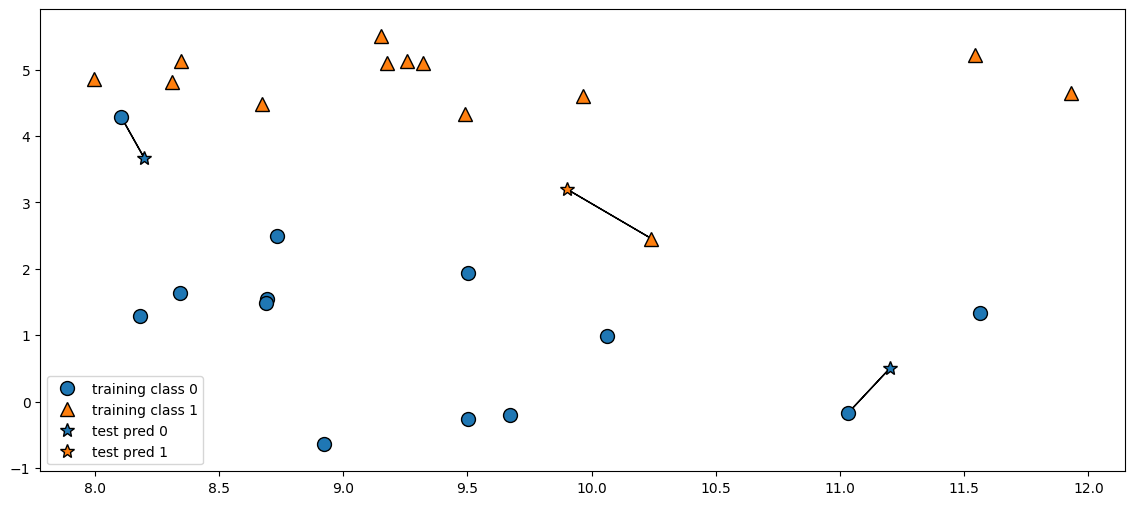

In [1]:
!pip install -q -r https://raw.githubusercontent.com/firrm/DAI/main/requirements.txt #ensure that the required packages are installed
import mglearn, sklearn
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [14, 6] #set figure width, height

## k-Nearest Neighbors classifier with k = 1 [3]
mglearn.plots.plot_knn_classification(n_neighbors=1) 
plt.show()

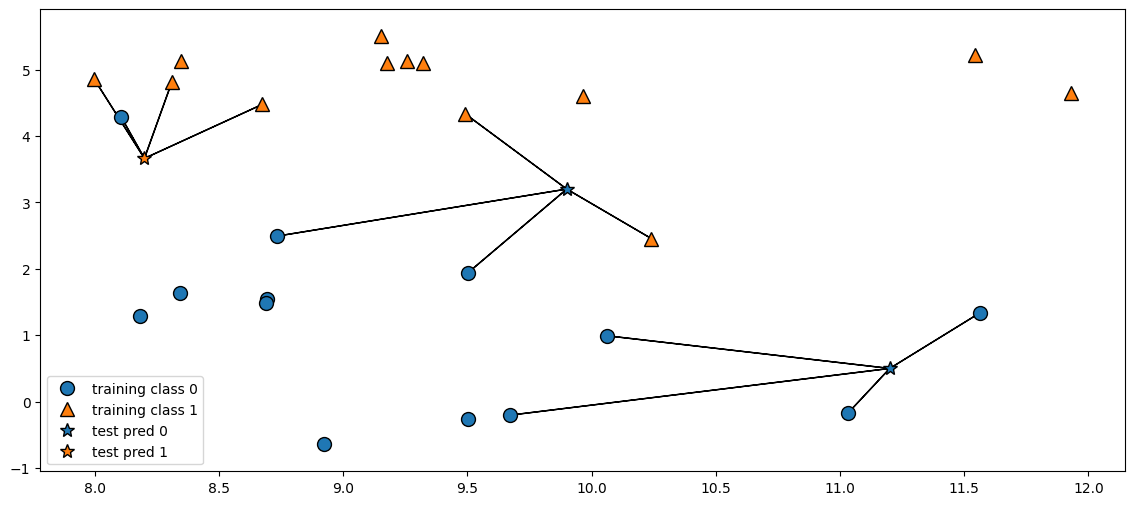

In [2]:
## k-Nearest Neighbors classifier with k = 4
mglearn.plots.plot_knn_classification(n_neighbors=4) 

<br/><br/>

A new data point is classified by a majority vote of its nearest neighbors, where the new data point is assigned the class label that is most common among its $k$ closest neighbors. Closeness implies a metric or distance function. Sklearn provides a KNN classifier with **Minkowski Distance** of order $p=2$ as the default metric:

\begin{align}
D(A,B)_{minkowski} = \Bigg(\sum_{i=1}^{n} |a_i-b_i|^p \Bigg)^{\frac{1}{p}}
\end{align}
<br/><br/>
where $A=(a_1,...,a_n)$ and $B=(b_1,...,b_n)$ are two data points and $p$ is the order. Sklearn also provides the **euclidean metric** (order $p=2$) and **manhattan metric** (order $p=1$). 
All distance measures require continous variables. If we observe categorical variables, the hamming metric should be used [3,4]. 

#### How to choose k?
In general, there is no optimal $k$ that fits all kinds of data sets. In practice, we choose an odd number of $k$ when the number of classes is even. Note that increasing the number of neighbors $k$ leads to an increase in **computational cost**.

For comparison, consider the **decision boundary** that separates classes. If we choose a single neighbor, we observe a decision boundary that closely follows the training set. Increasing the parameter $k$ makes the decision boundary smoother and the model simpler. Using only a few neighbors corresponds to a more complex model. The following example is taken from Müller (2016) and shows decision boundaries for different values of $k$:

0.2086 seconds (computation time) 
0.2852 seconds (computation time) 
0.5633 seconds (computation time) 


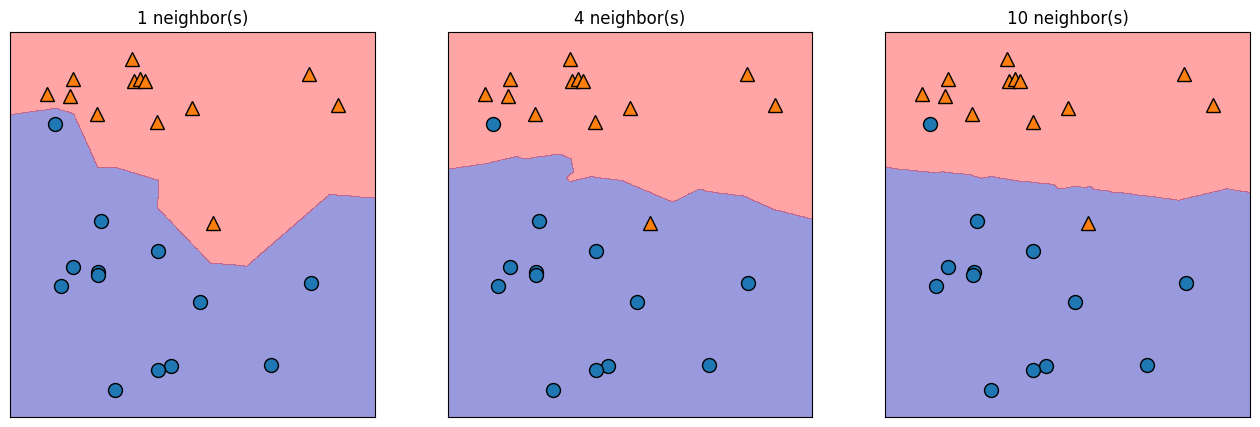

In [3]:
## decision boundaries for KNN [3]
import timeit
from sklearn.neighbors import KNeighborsClassifier

x,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for n_neighbors, ax in zip([1, 4, 10], axes):
    start_time = timeit.default_timer()
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x,y)
    mglearn.plots.plot_2d_separator(clf, x,fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    print("{:.4f} seconds (computation time) ".format(timeit.default_timer() - start_time))
plt.show()

<br/><br/>

In general, we choose a value of $k$ and evaluate the performance of the model. As you know from the previous lecture, we use the `score` method to check the accuracy of the model. The following KNN model has an accuracy of 85.71%, which tells us that the model correctly predicts the class for 85.71% of the observations (of the test data set).

In [4]:
## import train-test split
from sklearn.model_selection import train_test_split

## train-test-split 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

## initialize the KNN classifier
knn_example = KNeighborsClassifier(n_neighbors=4)
knn_example.fit(x_train, y_train)

## calculate the accuracy of the KNN classifier
print("Accuracy: {:.4f}".format(knn_example.score(x_test, y_test)))

Accuracy: 0.8571


<br/><br/>
#### Performance measures <a id='pm'></a>
We will now introduce the most common performance measures applied to machine learning algorithms. **Confusion matrices** are often used to evaluate classification models. For the binary classification problem the confusion matrix has the following form:

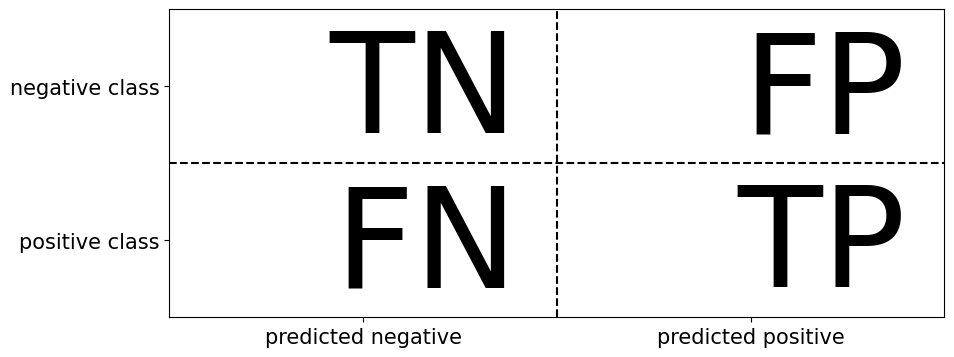

In [5]:
## confusion matrix [3]
plt.rcParams['figure.figsize'] = [10, 4]
mglearn.plots.plot_binary_confusion_matrix()

<br/><br/>

*TN* stands for *True Negative*, which means we predicted negative and it comes true. *True Positive (TP)* means we predict positive and it comes true. *False Positive (FP)* or **Type 1 Error** indicates that we predict positive and it is false. Finally, *FN* stands for *False Negative* or **Type 2 Error**, which means that we predict negative and it is false. 

Through the confusion matrix, we are able to calculate the following performance measures of interest [3]:

\begin{align}
Accuracy = \dfrac{TP+TN}{TP+TN+FP+FN}
\end{align}
<br/><br/>

**Accuracy**, which is basically the number of correct predictions divided by all entries of the confusion matrix. Further, we can define **Precision**

\begin{align}
Precision = \dfrac{TP}{TP+FP}
\end{align}
<br/><br/>

which measures how many of the observations are predicted as positive and are actually positive. 

\begin{align}
Recall = \dfrac{TP}{TP+FN}
\end{align}
<br/><br/>

Finally, **Recall** measures how many of the positive observations are captured by positive predictions. Recall as a performance measure is used to avoid false negatives. For example, in medical diagnosis, it is critical to find people who actually have a disease, while possibly including healthy people in the predictive analysis. In general, there is a trade-off between optimizing recall and optimizing precision.  

In [6]:
## import confusion from sklearn
from sklearn.metrics import confusion_matrix

## make prediction
prediction = knn_example.predict(x_test)

## print the confusion matrix
print("confusion matrix: \n" ,confusion_matrix(y_test, prediction))

confusion matrix: 
 [[1 0]
 [1 5]]


<br/><br/>

### Logistic Regression  <a id='logit'></a>
Another popular and powerful tool for solving classification problems is logistic regression. We observe $y \in \{ 0,1 \}$ (class 0 or class 1), our target variable, and a vector of feature variables $x =(x_0,...,x_n)^T$. If we assume a linear regression model $y= x^T \beta + \epsilon$, with coefficients $\beta = (\beta_0,...,\beta_p)$ and error term $\epsilon$, then the conditional probability that $y$ is classified as default given $x$ can be expressed as:

\begin{align}
\label{eq:lrg}
\pi(x) &:= P(y = 1 | x) = x^T \beta
\end{align}  
<br/><br/>

Unfortunately, values of $x^T \beta$ can lie outside of the $[0,1]$ range, which is the reason why the probability  $P(y = 1 | x)$ and its complementary probability $P(y = 0 | x)$ are modeled by applying a cumulative distribution function $F$ which satisfies the  $[0,1]$ constraint [5,6]:

\begin{align}
\pi(x) & := P(y= 1 | x) =F(x^T \beta) \\
\end{align}
<br/><br/>

The cumulative distribution function of the standard logistic distribution is defined as:

\begin{equation}
\label{eq:cdf}
\begin{aligned}
F(x^T \beta) & :=   \cfrac{1}{1+\exp(-x^T \beta)}
\end{aligned}
\end{equation}
<br/><br/>


Although the probability $\pi$ ranges between 0 and 1, where $x^T\beta$ may range from $- \infty \ \text{to} \ + \infty$, $\pi$ is nonlinear in $x$ and also nonlinear in the coefficients $\beta$  which causes an estimation problem. This problem can be solved by applying the so-called **logit transformation** on the odds ratio $\gamma$, which is defined as follows [5,6]:

\begin{align}
\label{eq:odds_ratio}
\gamma(x) =  \dfrac{P(y=1|x)}{P(y=0|x)} = \dfrac{\pi(x)}{1-\pi(x)}  = \exp(x^T \beta)
\end{align}
<br/><br/>

We apply the natural logarithm to obtain the logit transformation:
\begin{align}
\label{eq:regreq}
g(x) = \ln \left(\dfrac{\pi(x)}{1-\pi(x)} \right) = x^T\beta
\end{align}
<br/><br/>


We estimate the coefficients $\beta = (\beta_0,...,\beta_p)$ by using **maximum likelihood estimation** (MLE). The MLE yields values for the unknown coefficients of the logit model that maximize the probability of obtaining the observed data. First, we construct the so-called likelihood function, and second, we identify estimators that maximize the likelihood function. Assuming that the observations are independent and identically distributed, we can construct the likelihood function as a product of probabilities [5,6]:

\begin{align}
\label{eq:lhf}
l(\beta) = \prod_{i = 1}^n \pi(x_i)^{y_i} \left(1-\pi(x_i)\right)^{1-y_i}  
\end{align}
<br/><br/>

Mathematically, it is much easier and more common to maximize the log-likelihood function using the natural logarithm:

\begin{align}
L(\beta) = \ln(l(\beta)) = \sum_{i = 1}^n y_i \ln\left(\pi(x_i)\right)  + (1-y_i) \ln\left( 1- \pi(x_i)\right)
\label{eq:loglikefunc}
\end{align}
<br/><br/>

After estimating the model coefficients, $\beta$ binary classification can be made by considering the following threshold $\theta$. If we assume a threshold of  $\theta = 0.5$ and probabilities $\pi(x)$ with $\pi \geq 0.5$, then the observation with features $x$ is classified as class 1 (and class 0 if $\pi < 0.5$).

Logistic regression returns a **decision boundary**:

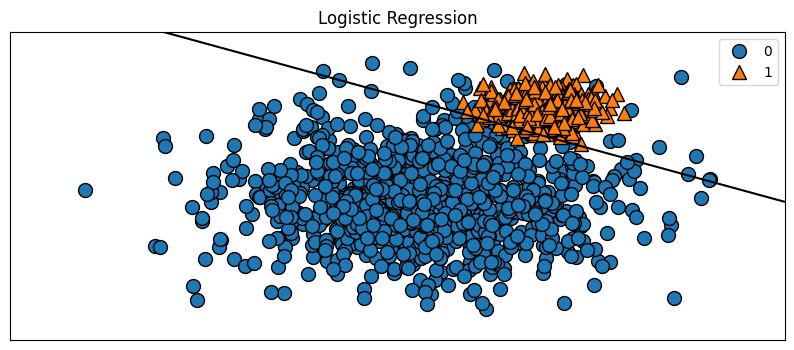

In [7]:
## import logistic regression function from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

## create a dataset
x, y = make_blobs(n_samples=(1000, 400), cluster_std =[3.5, 1], random_state = 22)

## initialize the model
log_reg = LogisticRegression()
fit = log_reg.fit(x, y)

## plot the decision boundary [3]
mglearn.plots.plot_2d_separator(fit, x)
mglearn.discrete_scatter(x[:, 0], x[:, 1], y)

plt.rcParams['figure.figsize'] = [14, 6] #set figure width, height
plt.title("Logistic Regression")
plt.legend()
plt.show()

We train a logisitic regression model and evaluate the model's performance:

In [8]:
## train-test-split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

## fit a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

## predict the class labels for the test data
prediction = log_reg.predict(x_test)

## confusion matrix
print("confusion matrix: \n" ,confusion_matrix(y_test, prediction))

confusion matrix: 
 [[189   4]
 [  2  85]]


<br/><br/>

#### Performance measures <a id='pm1'></a>

So far, we have seen that confusion matrices are a simple way to evaluate a classification model. Another performance measure is the Receiver Operating Characteristics (ROC) curve. The **ROC curve** plots the false positive rate (FPR) against the true positive rate (TPR), taking into account all possible thresholds of a classifier. The true positive rate is thus basically another notation for *Recall*. The false positive rate is defined as 

\begin{align}
FPR=\dfrac{FP}{FP+TN}
\end{align}
<br/><br/>

\begin{align}
TPR = \dfrac{TP}{TP+FN}
\end{align}
<br/><br/>

The optimal ROC curve is close to the top left. Then, the classification model produces a high recall while the false positive rate is low [3,4]. 

The Area Under the (ROC) Curve (**AUC**) is a measure of separability. The larger the area under the ROC curve, the better the classification model. The AUC indicates the ability of the model to discriminate between classes. The higher the AUC value (AUC=1 is optimal), the better is our model at predicting class 0 as class 0 and class 1 as class 1 [3]. Note that an AUC of 0.5 suggests that there is no discrimination at all, so we might as well flip a coin.
<br/><br/>



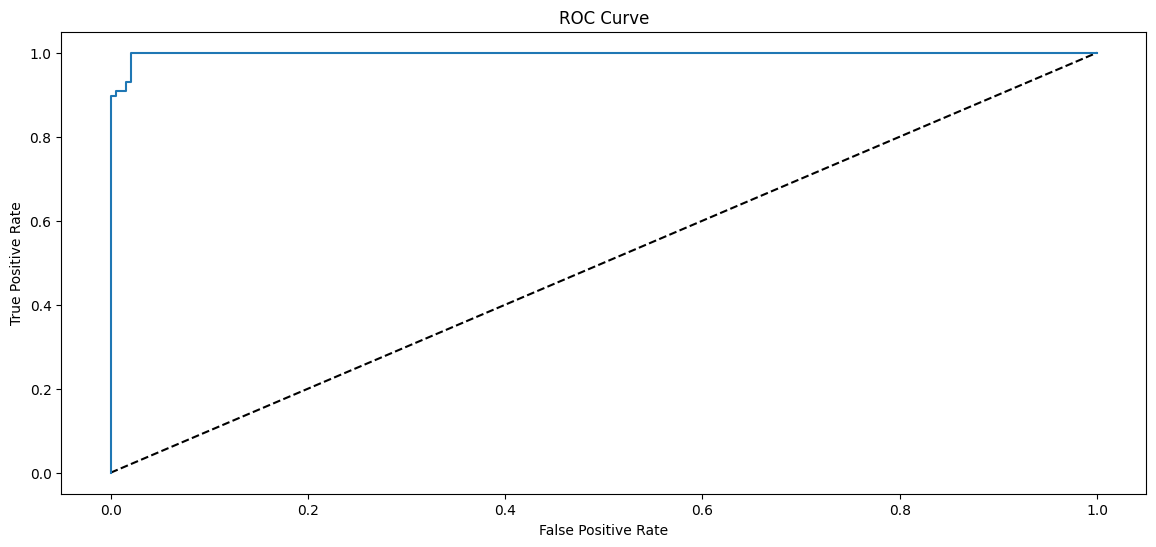

Area under the curve: 0.9982


In [9]:
from sklearn.metrics import roc_curve, roc_auc_score

## compute predicted probabilities
predicted_proba = log_reg.predict_proba(x_test)[:,1]

## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_proba)

## plot ROC curve
plt.rcParams['figure.figsize'] = [14, 6] #set figure width, height
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## calculate the area under the curve (AUC)
print("Area under the curve: {:.4f}".format(roc_auc_score(y_test, predicted_proba)))

<br/><br/>

### Support Vector Machine  <a id='svm'></a>
As we have seen so far, we are looking for a linear decision boundary to solve classification problems. In fact, this does not work for every data set. There may be cases where classes overlap and are therefore not linearly separable (as an example, see the figure below, adapted from Müller (2016)). This is where the **Support Vector Machine (SVM)** comes in. The SVM is a technique that creates a **nonlinear decision boundary** by constructing a linear boundary in a transformed version of the feature space [4].   

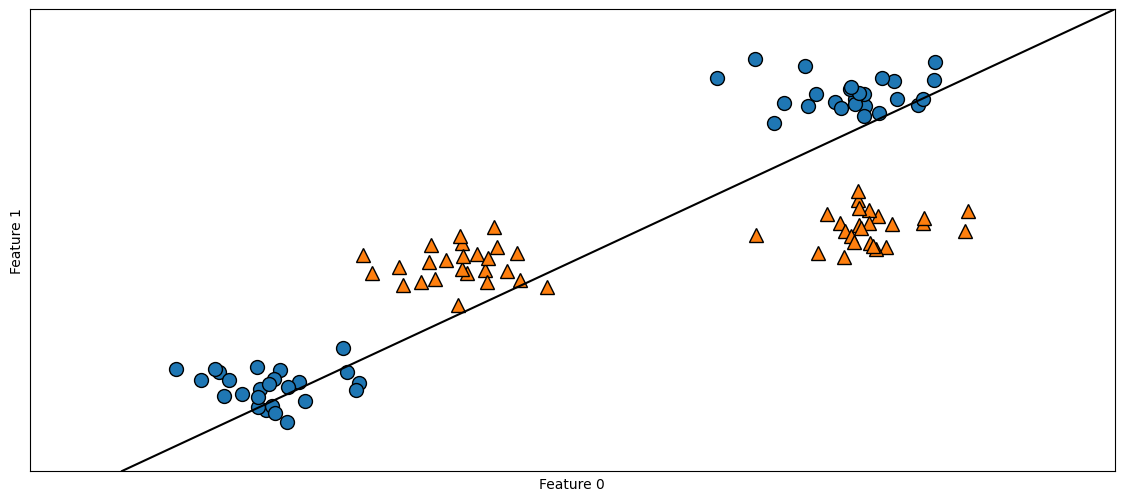

In [10]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

from sklearn.svm import LinearSVC
linear_svm = LinearSVC(dual=False).fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

<br/><br/>

We consider a training data set with $n$ pairs $(x_1,y_1),...,(x_n,y_n)$ with $x_i \in \mathbb{R^p}$ and $y_i \in \{-1,1\}$ [4]. We define a hyperplane by 

\begin{align}
\{x: f(x) = \beta_0 + x^T\beta = 0 \} 
\end{align}
<br/><br/>
where $\beta$ is the unit vector $||\beta|| =1$, and a classification rule is defined as

\begin{align}
G(x) = sign(\beta_0 + x^T\beta)
\end{align}
<br/><br/>

$f(x)$ gives a signed distance from a point $x$ to the hyperplane, which we have defined above. If both classes are separable, we will find a function $f(x)= \beta_0 + x^T\beta$ with $y_if(x_i)>0 \  \forall i$. This means that we are able to find a hyperplane that creates the largest margin between the data points for both classes. This results in an optimization problem where we aim to maximize the margin with $i=1,...,n$ [4]:

\begin{alignat}{2}
&\!\max_{\beta, \beta_0, ||\beta||=1} M    \\
&\text {s.t.} \ y_i(\beta_0 + x_i^T\beta) \geq M\\
\end{alignat}

The stripe in the figure is $M$ units away from the hyperplane on both sides, thus 2M units wide. This is called the **margin**. Our goal is to **maximize the margin** ("maximize the width of the street"). 

<br></br>
<img src="https://raw.githubusercontent.com/firrm/DAI/main/assets/svm.png" alt="Drawing" style="width: 450px;"/>
<br/><br/>

We can rewrite the optimization problem with $i = 1,...,n$ to obtain convex optimization problem

\begin{alignat}{2}
&\!\min_{\beta, \beta_0} ||\beta||   \\
&\text {s.t.} \ y_i(\beta_0 + x_i^T\beta) \geq 1\\
\end{alignat}
<br/><br/>

If both classes overlap in the feature space, we still maximize the margin, but allow that some data points are on the other side of the margin [4]. We define slack variables $\zeta_1,...,\zeta_n$ and rewrite the optimization problem as

\begin{alignat}{2}
&\!\min_{\beta, \beta_0} ||\beta||   \\
&\text {s.t.} \ y_i(\beta_0 + x_i^T\beta) \geq 1-\zeta_i \  \forall i\\
& \ \ \ \ \ \zeta_i \geq 0, \ \sum \zeta_i \geq const.
\end{alignat}

<br></br>
<img src="https://raw.githubusercontent.com/firrm/DAI/main/assets/slack.png" alt="Drawing" style="width: 450px;"/>
<br/><br/>

Both figures are taken from Friedman (2001). 
To solve the convex optimization problem, we use lagrange multipliers. For computational purposes, it is common to rewrite the optimization problem:

\begin{alignat}{2}
&\!\min_{\beta, \beta_0} \dfrac{1}{2} ||\beta||^2 + C \sum_{i=1}^n \zeta_i  \\
&\text {s.t.} \ y_i(\beta_0 + x_i^T\beta) \geq 1-\zeta_i \ , \zeta_i \geq 0\ \forall i\\
\end{alignat}

The parameter $C$ is the constant. If $C=\infty$, we obtain the separable case [4]. Extensive mathematical derivations can be found in Friedman (2001). The main result is the lagrange dual function containing feature vectors $h(x_i)$:

\begin{align}
L = \sum_{i=1}^n \alpha_i - \dfrac{1}{2} \sum_{i=1}^n \sum_{i'=1}^n \alpha_i \alpha_{i'}y_i y_{i'} \langle h(x_i),h(x_{i'}) \rangle
\end{align}
<br/><br/>

For specific choices of $h(x)$, the inner products can be computed very cheaply. In general, we do not have to specify the transformation $h(x)$. We only need a particular **kernel function** $K(x,x') =  \langle h(x),h(x') \rangle $, which computes the inner products in a transformed feature space. Here are two choices of the kernel function:

\begin{align}
\text{d-th degree polynomial kernel} \ \ K(x,x') = (1+ \langle x,x' \rangle)^d \\
\text{gaussian kernel} \ \ K(x,x') = \exp(-\gamma ||x-x'||^2)
\end{align}
<br/><br/>
This is also called the **kernel trick**. It works by directly computing the distance or the scalar products of the data points for the transformed feature representation, without actually computing the entire transformation.

As we have seen, the SVM computes a nonlinear decision boundary by constructing a linear boundary in a transformed version of the feature space. In general, only a few observations in the training data define the decision boundary. The observations that lie on the boundary between classes are called **support vectors**.

The two figures below show how a decision boundary is found in the transformed feature space [3]: 

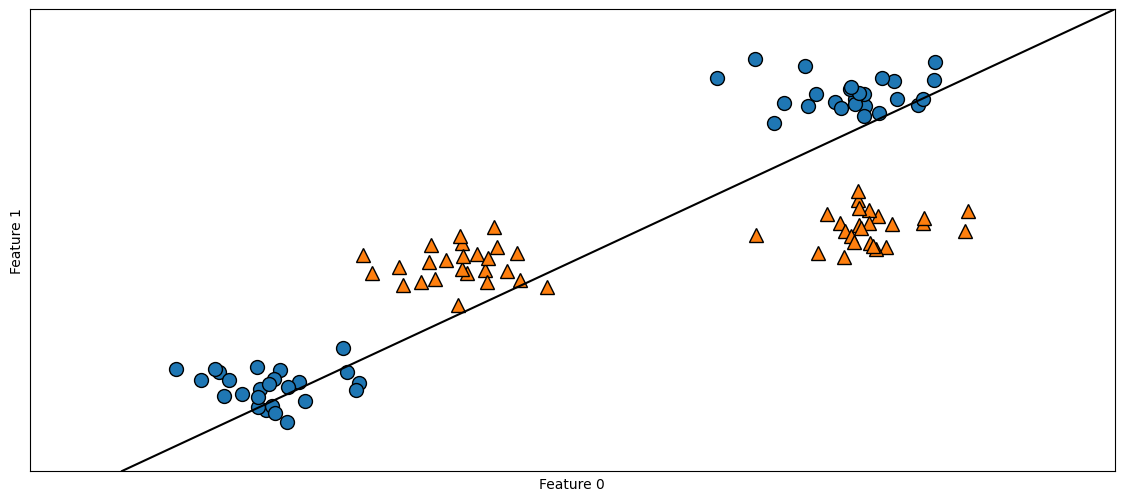

In [11]:
## overlapping classes 2D representation with linear SVM decision boundary [3]
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

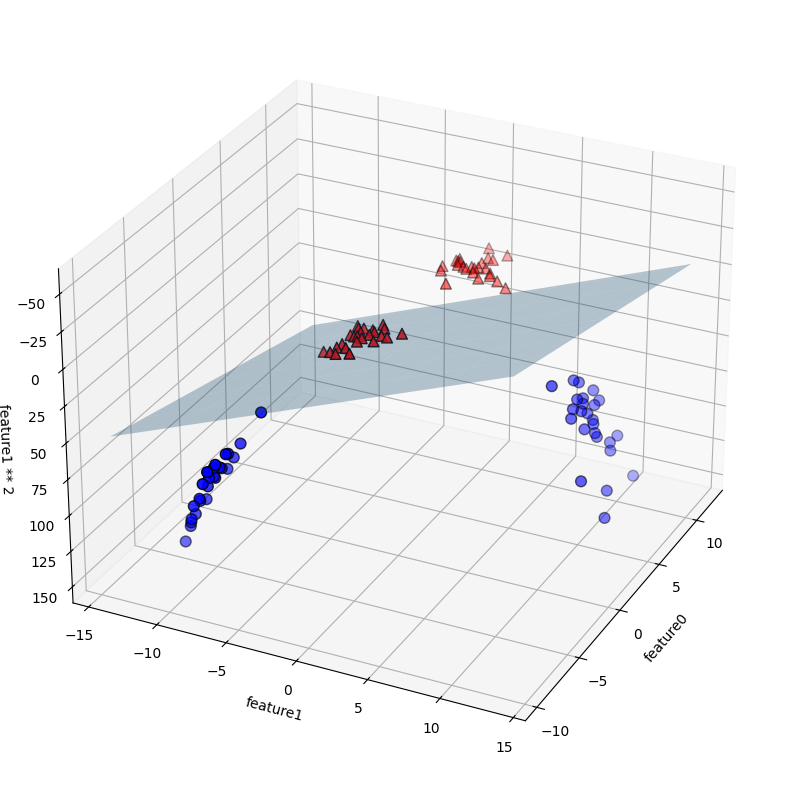

In [12]:
## 3D transformed feature space with linear decision boundary [3]

plt.rcParams['figure.figsize'] = [10, 10]
X_new = np.hstack([X, X[:, 1:] ** 2])
linear_svm_3d = LinearSVC(dual=False).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
mask = y == 0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")
ax.view_init(elev=-152, azim=-26)
plt.show()


<br/><br/>

### Session takeaways 

*What have we learned in this session?*

- We know the standard models for classification: k-nearest neighbors, logistic regression 
- We are able to evaluate a classification model's performance: confusion matrices and AUC 
- If classes are not linearly separable, we may apply the SVM to find a decision boundary in a transformed feature space


*What next?*

During the hands-on session, you will use k-nearest neighbors, logistic regression, and the SVM to dive deeper into classification. We will look at credit transaction data and build a fraud detection algorithm.
***

### References
***

[1] Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., & Vanderplas, J. (2011). Scikit-learn: Machine learning in Python. the Journal of machine Learning research, 12, 2825-2830.

[2] Garreta, R., & Moncecchi, G. (2013). Learning scikit-learn: machine learning in python. Packt Publishing Ltd.

[3] Müller, A. C., & Guido, S. (2016). Introduction to machine learning with Python: a guide for data scientists. " O'Reilly Media, Inc.".

[4] Friedman, Jerome, Trevor Hastie, and Robert Tibshirani (2001). The elements of statistical learning.

[5] Hosmer, David W and Stanley Lemeshow (1980). Goodness of fit tests for the
multiple logistic regression model

[6] Gujarati, D. N. (2009). Basic econometrics.